In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from skimage.transform import resize
import cv2
import os
from preprocess import preprocess_image
import tensorflow as tf
import tqdm
import datetime

In [2]:
# check gpu
if tf.test.gpu_device_name():
   print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

Default GPU Device: /device:GPU:0


In [3]:
ORIGINAL_SIZE = 424
IMG_SIZE = 128
BATCH_SIZE = 32

In [4]:
data_dir = 'galaxy-zoo-the-galaxy-challenge/images_training_rev1'

In [5]:
for root, dir, fname in os.walk(data_dir):
    print(os.path.join(data_dir, fname[0]))

galaxy-zoo-the-galaxy-challenge/images_training_rev1\100008.jpg


<class 'numpy.ndarray'> (424, 424, 3)


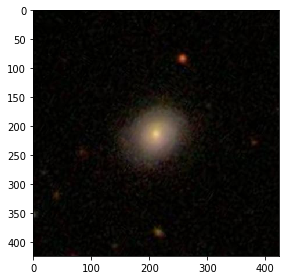

In [6]:
# load sample image
from skimage import io, color
img = io.imread('galaxy-zoo-the-galaxy-challenge/images_training_rev1/100008.jpg')

print(type(img), img.shape)
io.imshow(img)
io.show()

## Load Data

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
labels_df = pd.read_csv('galaxy-zoo-the-galaxy-challenge/training_solutions_rev1.csv')

In [9]:
# labels_df.set_index('GalaxyID', inplace=True)

In [10]:
labels_df

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61573,999948,0.510379,0.489621,0.000000,0.059207,0.430414,0.000000,0.430414,0.226257,0.204157,...,0.000000,0.226257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.226257
61574,999950,0.901216,0.098784,0.000000,0.000000,0.098784,0.000000,0.098784,0.000000,0.098784,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
61575,999958,0.202841,0.777376,0.019783,0.116962,0.660414,0.067245,0.593168,0.140022,0.520391,...,0.000000,0.000000,0.090673,0.049349,0.000000,0.067726,0.000000,0.000000,0.0,0.072296
61576,999964,0.091000,0.909000,0.000000,0.045450,0.863550,0.022452,0.841098,0.795330,0.068220,...,0.000000,0.068398,0.318132,0.408799,0.227464,0.408799,0.090668,0.023065,0.0,0.045334


In [11]:
# number of classes
labels_df.shape[1]

38

In [12]:
labels_df.index.array.astype(int).astype(str)

array(['0', '1', '2', ..., '61575', '61576', '61577'], dtype='<U11')

In [13]:
# labels_df.values[:,:]

In [ ]:
def load_and_preprocess_image(path):
    # img_path = os.path.join(data_dir, path + '.jpg')
    img_path = data_dir + '/' + path + '.jpg'
    image = tf.io.read_file(img_path)
    return preprocess_image(image, image_size=IMG_SIZE)

In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(labels_df.index.astype(int).astype(str),
                                                        labels_df.values[:,:], test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((49262,), (12316,), (49262, 37), (12316, 37))

In [ ]:
# data_dir + '/' + X_train[0] + '.jpg'
# os.path.join(data_dir, X_train[0] + '.jpg')

In [14]:
dir = 'galaxy-zoo-the-galaxy-challenge/images_training_rev1'

images = []
image_names = []
# max_images = 1000
count = 0

for filename in os.listdir(dir):
    # print(os.path.join(dir, filename))
    # if count >= max_images:
    #     break
    #print(os.path.join(dir, filename))
    img = io.imread(os.path.join(dir, filename))
    images.append(img)
    image_names.append(filename[:-4])
    count += 1

# images = np.stack(images)

# images = images.reshape((images.shape[0], images[0].shape[0] * images[0].shape[1] * images[0].shape[2]))

In [58]:
np.array(images).shape

(1000, 424, 424, 3)

In [49]:
np.vstack(images).shape

(424000, 424, 3)

In [56]:
np.concatenate(images,axis=0).shape

(424000, 424, 3)

In [59]:
np.stack(images, axis=0).shape

(1000, 424, 424, 3)

In [15]:
images = np.stack(images, axis=0)
# images.shape

MemoryError: Unable to allocate 30.9 GiB for an array with shape (61578, 424, 424, 3) and data type uint8

In [16]:
len(images)

61578

In [36]:
# Allocating classes
y = []
for name in image_names:
    y.append(np.argmax(np.array(labels_df[labels_df['GalaxyID'] == int(name)].drop('GalaxyID', axis=1))))
classes = labels_df.columns[1:].tolist()
n_classes = len(classes)

In [38]:
n_classes

37

In [20]:
images

array([[ 2,  2,  0, ...,  0,  0,  0],
       [ 5,  5,  3, ...,  8,  8,  6],
       [ 7,  7,  5, ...,  7,  7,  5],
       ...,
       [ 5,  7,  4, ...,  9, 10,  5],
       [ 1,  1,  0, ...,  3,  3,  1],
       [ 2,  0,  1, ...,  2,  2,  2]], dtype=uint8)

## Convert training Data to TF Data

In [ ]:
path_ds = tf.data.Dataset.from_tensor_slices(X_train)
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(y_train, tf.float32))
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))

In [ ]:
ds = image_label_ds
ds = ds.apply(
    tf.data.experimental.shuffle_and_repeat(buffer_size=1000))
ds = ds.batch(BATCH_SIZE)

Instructions for updating:
Use `tf.data.Dataset.shuffle(buffer_size, seed)` followed by `tf.data.Dataset.repeat(count)`. Static tf.data optimizations will take care of using the fused implementation.


In [ ]:
ds

<BatchDataset shapes: ((None, 128, 128, 3), (None, 37)), types: (tf.float32, tf.float32)>

## Convert test Data to TF Data

In [ ]:
path_ds_test = tf.data.Dataset.from_tensor_slices(X_test)
image_ds_test = path_ds_test.map(load_and_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
label_ds_test = tf.data.Dataset.from_tensor_slices(tf.cast(y_test, tf.float32))
image_label_ds_test = tf.data.Dataset.zip((image_ds_test, label_ds_test))

ds_test = image_label_ds_test
ds_test = ds_test.batch(BATCH_SIZE)

In [ ]:
y_test.shape

(12316, 37)

In [ ]:
ds

<BatchDataset shapes: ((None, 128, 128, 3), (None, 37)), types: (tf.float32, tf.float32)>

In [ ]:
for x, y in ds:
    print(x.shape, y.shape)
    break

(32, 128, 128, 3) (32, 37)


In [ ]:
# for x, y in ds:
#     print(x, y)
#     break

## Model

In [ ]:
from tensorflow.keras import layers

In [ ]:
from tensorflow import keras
from tensorflow.keras import models, layers, regularizers, optimizers
from cnn import SimpleCNN
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
cnn_model = SimpleCNN(img_size=IMG_SIZE, num_classes=labels_df.shape[1])

In [ ]:
cnn_model.input_shape

(None, 128, 128, 3)

In [ ]:
cnn_model.summary()

Model: "SimpleCNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 128)     3584      
_________________________________________________________________
activation (Activation)      (None, 128, 128, 128)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        73792     
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0 

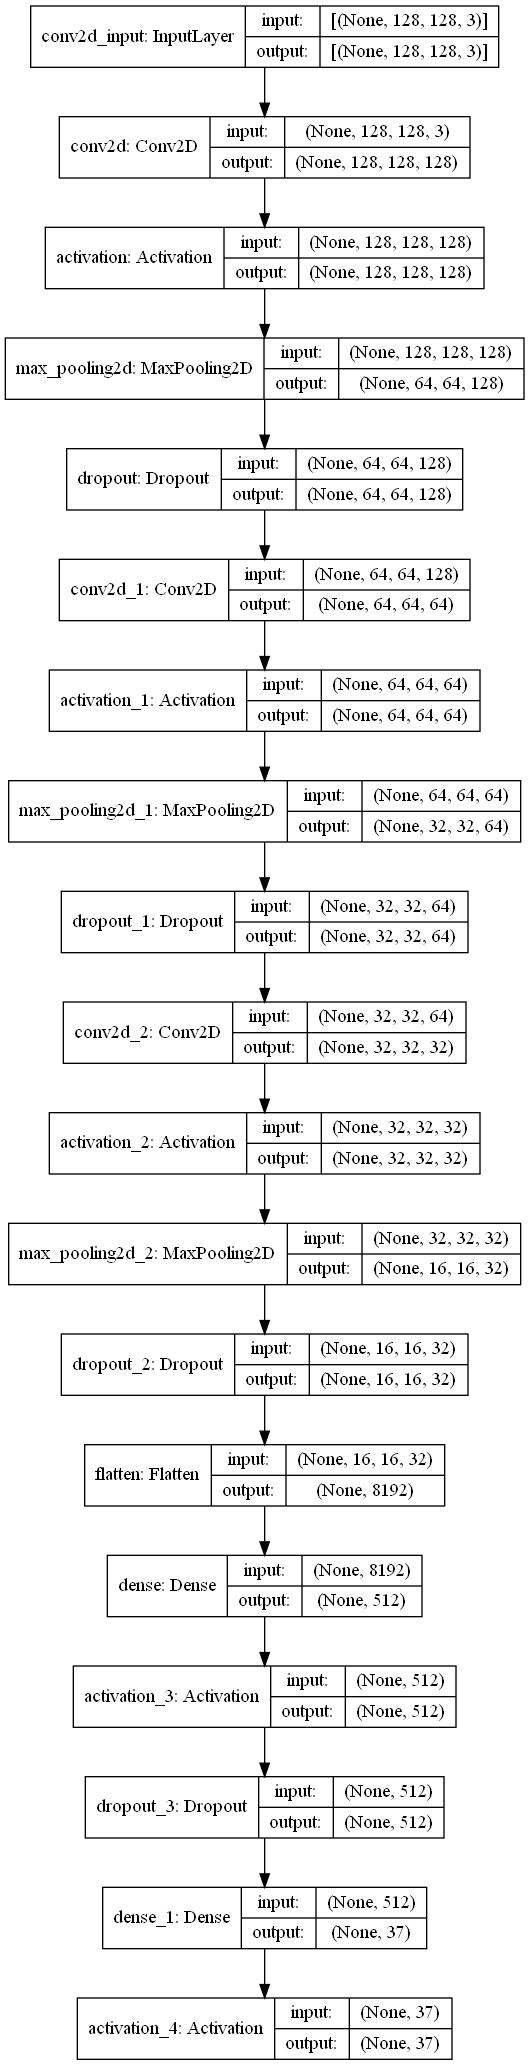

In [ ]:
plot_model(cnn_model, show_shapes=True, to_file=f'{cnn_model.name}.jpg')

In [ ]:
def root_mean_square_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [ ]:
cnn_model.compile(loss='categorical_crossentropy', 
                    optimizer=optimizers.Adam(learning_rate=1e-8), 
                    metrics=['acc', root_mean_square_error])

In [ ]:
# define early stopping callback and model checkpoint callback
checkout_best_model = 'model/Best_Model_SimpleCNN.h5'
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=150)
mc = ModelCheckpoint(checkout_best_model, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [ ]:
# define tensorboard callback
log_dir = 'logs/fit/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
# !tensorboard --logdir=logs/fit/ --port=8080

In [ ]:
%%time
history = cnn_model.fit(ds, epochs=35, steps_per_epoch=X_train.shape[0] // BATCH_SIZE, 
                        use_multiprocessing=True,validation_steps=X_test.shape[0] // BATCH_SIZE, validation_data=ds_test, 
                        callbacks=[es, mc, tensorboard_callback])

Epoch 1/35
1539/1539 [==============================] - 46s 27ms/step - loss: 18.2113 - acc: 0.0205 - root_mean_square_error: 0.2586 - val_loss: 18.2391 - val_acc: 0.0476 - val_root_mean_square_error: 0.2590

Epoch 00001: val_loss improved from inf to 18.23906, saving model to model\Best_Model_SimpleCNN.h5
Epoch 2/35
1539/1539 [==============================] - 40s 26ms/step - loss: 18.1673 - acc: 0.0360 - root_mean_square_error: 0.2584 - val_loss: 18.2100 - val_acc: 0.1364 - val_root_mean_square_error: 0.2589

Epoch 00002: val_loss improved from 18.23906 to 18.20996, saving model to model\Best_Model_SimpleCNN.h5
Epoch 3/35
1539/1539 [==============================] - 40s 26ms/step - loss: 18.1228 - acc: 0.0622 - root_mean_square_error: 0.2583 - val_loss: 18.1806 - val_acc: 0.1975 - val_root_mean_square_error: 0.2588

Epoch 00003: val_loss improved from 18.20996 to 18.18064, saving model to model\Best_Model_SimpleCNN.h5
Epoch 4/35
1539/1539 [==============================] - 39s 26ms/s